# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

Pu Zheng: updated this example to match version for 2018.12.20

# Imports

In [102]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections, classes
print(os.getpid())

36872


In [158]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.External.Fitting_v3)
reload(ia.domain_tools)

<module 'ImageAnalysis3.domain_tools' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\domain_tools.py'>

# Create Cell_Data object

## create cell_data class and load basic info

In [159]:
fov_id = 0
cell_id = 3
# specify initialization parameters:
param = {'data_folder':r'Y:\20190302_IMR90_CTP05_intronFISH',
         'fov_id': fov_id,
         'cell_id': cell_id,
         #'save_folder':r'I:\Pu_temp\RNA',
         'save_folder': r'\\chem-zhuanglab\SSD_01\20190302_intronicRNA_unique',
         'num_threads': 18,
         'correction_folder':r'I:\Corrections',
         };
# initialize cell_data class:
rna = ia.classes.Cell_Data(param, _color_filename='Color_Usage_test')

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 60
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\Color_Usage_test.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 33 folders are found according to color-usage annotation.


## Load more info for cell

In [160]:
# load existing cell_info, dont run for the first time
rna._load_from_file('cell_info')
# load segmentation
rna._load_segmentation(_force=False);
# load drift info
drift = rna._load_drift(_size=350, _dynamic=True, _coord_sel=[500,500],
                      _num_threads=18,_sequential_mode=False,_force=False)

- drift already exists for cell:3, skip


In [161]:
new_rna = rna._transfer_data_type('unique', 'rna-unique', 
                                  _new_savefolder=r'I:\Pu_temp\RNA', _load_in_ram=True)

-- start transfering fov:0, cell:3 from unique to rna-unique
-- prepare attributes:
- Loading unique from file: \\chem-zhuanglab\SSD_01\20190302_intronicRNA_unique\fov-0\cell-3\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]
--- distmap_savefile:\\chem-zhuanglab\SSD_01\20190302_intronicRNA_unique\fov-0\cell-3\distance_maps.npz not exist, exit!
--- attributes to be converted to new datatype: ['unique_ims', 'unique_ids', 'unique_channels', 'unique_spots']
--- attributes remain unchanged: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'chrom_coords', 'chrom_im', 'chrom_segmentation', 'color

In [157]:
dir(new_rna)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_background',
 '_call_AB_compartments',
 '_check_drift',
 '_check_full_set',
 '_crop_images',
 '_dynamic_picking_spots',
 '_generate_chromosome_image',
 '_generate_distance_map',
 '_identify_chromosomes',
 '_load_color_info',
 '_load_drift',
 '_load_encoding_scheme',
 '_load_from_file',
 '_load_segmentation',
 '_match_regions',
 '_multi_fitting_for_chromosome',
 '_naive_picking_spots',
 '_pick_chromosome_manual',
 '_pick_spots',
 '_save_to_file',
 '_transfer_data_type',
 '_update_chromosome_from_file',
 'analysis_folder',
 'annotated_folders',
 'bead_channel_index',
 'cell_id',
 'chann

### check drift

In [9]:
crop = np.array([[0,30],[500,1000],[500,1000]])
data_folder = r'Y:\20190302_IMR90_CTP05_intronFISH'
test_ims = [corrections.correct_single_image(os.path.join(data_folder, _hyb_name),
                                              488, crop_limits=crop, drift=_dft, verbose=True)
                                              for _hyb_name, _dft in rna.drift.items()]

- Start correcting H1R1\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H2R2\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H3R3\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H4R4\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H5R5\Conv_zscan_00.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 500, 500) for channel:488
- Start correcting H

<IPython.core.display.Javascript object>


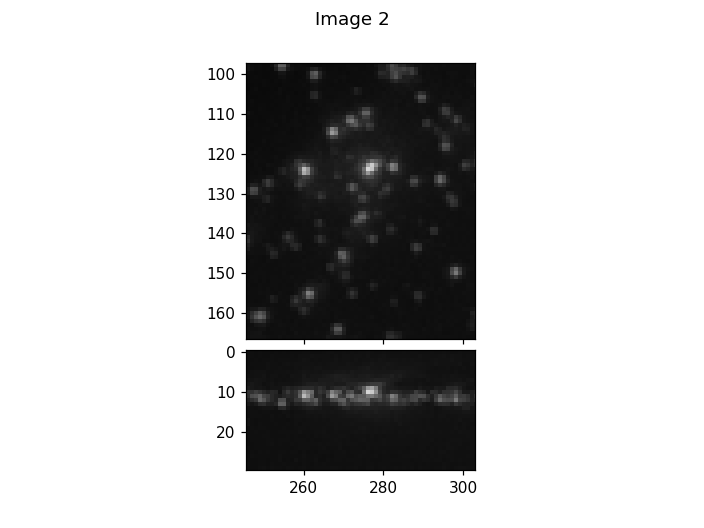

In [10]:
%matplotlib notebook
#lst.cells[2]._load_from_file('unique')
#visual_tools.imshow_mark_3d_v2(lst.cells[2].unique_ims)
visual_tools.imshow_mark_3d_v2(test_ims)

# Load and crop images from raw data

In [99]:
unique_ims, unique_ids, unique_channels = rna._crop_images('rna-unique',_load_in_ram=True)

- Start cropping rna-unique image
- all channels in hyb:H0R0\Conv_zscan_00.dax already exists in rna-unique_ims, skip!
-- start cropping rna-unique for fov:0, cell:1 with 18 threads
-- lengths: 93 93 93
-- time spent in cropping:108.60589051246643
- create save_folder:I:\Pu_temp\RNA\fov-0\cell-1
	 for fov:0, cell:1
-- saving rna-unique to file: I:\Pu_temp\RNA\fov-0\cell-1\rna-unique_rounds.npz with 93 images
--- time spent in saving:45.740049839019775
- saving cell_info to file:I:\Pu_temp\RNA\fov-0\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fovs', 'map_folder', 'num_threads', 'rna-unique_channels', 'rna-unique_ids', 'save_folder', 'segmentation_crop', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 

## Save to file 

In [43]:
#a._save_to_file('all') # save all

rna._save_to_file('cell_info') # save all cell_info exclude images

#a._save_to_file('unique') # save unique info into unique_rounds.npz

- saving cell_info to file:I:\Pu_temp\RNA\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\RNA\fov-0\cell-0\cell_info.pkl
- Writing cell data to file: I:\Pu_temp\RNA\fov-0\cell-0\cell_info.pkl


# Generate and Pick chromosome

## generate and identify chromosome

-- cell:1 in fov:0 doesnot have rna-unique_ims, trying to load now.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:382: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


<IPython.core.display.Javascript object>


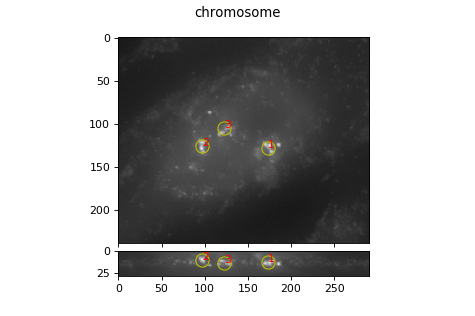

In [107]:
%matplotlib notebook
# generate
rna._generate_chromosome_image('rna-unique')
# identify
rna._identify_chromosomes();
# manually pick for only this cell
rna._pick_chromosome_manual()

# then do manual picking and close the matplotlib notebook inferface.

## Update chromosome coordinate info

In [108]:
rna._update_chromosome_from_file();

-- 3 loaded
- saving cell_info to file:I:\Pu_temp\RNA\fov-0\cell-1\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\RNA\fov-0\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords', 'chrom_im', 'chrom_segmentation']
- Writing cell data to file: I:\Pu_temp\RNA\fov-0\cell-1\cell_info.pkl


# Fitting and picking spots for unique images

## Load unique images

In [110]:
# unique
rna._load_from_file('rna-unique', _overwrite=False)

- Loading unique from file: I:\Pu_temp\RNA\fov-0\cell-1\rna-unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


## multi-fitting

In [111]:
cand_spots = rna._multi_fitting_for_chromosome(_data_type='rna-unique',
                                             _num_threads=20, _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-7, _save=False)
#cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)

- Start multi-fitting for rna-unique images
++ start fitting rna-unique for fov:0, cell:1 with 20 threads
++ total time in fitting rna-unique: 9.748284339904785


## picking spots by intensity

In [51]:
naive_picked_pts = rna._naive_picking_spots('unique', _save=False)

+ Pick unique spots for by brightness in fov:37, cell:0


### distance map for one chromosome

In [52]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{rna.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_picked_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * rna.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))
# plot
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=0, vmax=2000)
plt.colorbar()

chromosome id:0, coordinate:[  5.07342105  76.56026316 112.51026316]


## dynamic picking spots

In [57]:
from ImageAnalysis3 import analysis
reload(analysis)

<module 'ImageAnalysis3.analysis' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\analysis.py'>

In [112]:
_picked_pts = rna._pick_spots('rna-unique', 'EM')

- Start EM picking rna-unique spots, fov:0, cell:1.
- EM picking spots for 93 regions.
-- filtering spots by intensity threshold = 1.
-- initialize EM by naively picking spots!
-- EM iter:0
--- E time: 0.013 s,
--- M time: 0.0901 s.
--- change_ratio: 0.12903225806451613
-- EM iter:1


E:\Users\puzheng\Documents\ImageAnalysis3\analysis.py:1755: RuntimeWarning: Mean of empty slice
  np.nanmean(chr_sel_zxy[_ind], axis=0) - _spot))


--- E time: 0.014 s,
--- M time: 0.0901 s.
--- change_ratio: 0.010752688172043012
-- EM iter:2
--- E time: 0.013 s,
--- M time: 0.0901 s.
--- change_ratio: 0.0
-- applying stringency cehck for spots, theshold=-1.8278577144241606
--- 25 spots didn't pass stringent quality check.
- EM picking spots for 93 regions.
-- filtering spots by intensity threshold = 1.
-- initialize EM by naively picking spots!
-- EM iter:0
--- E time: 0.012 s,
--- M time: 0.084 s.
--- change_ratio: 0.10752688172043011
-- EM iter:1
--- E time: 0.012 s,


E:\Users\puzheng\Documents\ImageAnalysis3\analysis.py:2070: RuntimeWarning: invalid value encountered in less
  if np.sum(_sel_scores < _final_check_th) > 0:
E:\Users\puzheng\Documents\ImageAnalysis3\analysis.py:2071: RuntimeWarning: invalid value encountered in less
  _inds = np.where(_sel_scores < _final_check_th)[0]


--- M time: 0.0861 s.
--- change_ratio: 0.010752688172043012
-- EM iter:2
--- E time: 0.012 s,
--- M time: 0.084 s.
--- change_ratio: 0.0
-- applying stringency cehck for spots, theshold=-5.378963438666536
--- 8 spots didn't pass stringent quality check.
- EM picking spots for 93 regions.
-- filtering spots by intensity threshold = 1.
-- initialize EM by naively picking spots!
-- EM iter:0
--- E time: 0.01 s,
--- M time: 0.0821 s.
--- change_ratio: 0.10752688172043011
-- EM iter:1
--- E time: 0.011 s,
--- M time: 0.0811 s.
--- change_ratio: 0.010752688172043012
-- EM iter:2
--- E time: 0.011 s,
--- M time: 0.082 s.
--- change_ratio: 0.0
-- applying stringency cehck for spots, theshold=-3.0154824532316926
--- 24 spots didn't pass stringent quality check.
- saving cell_info to file:I:\Pu_temp\RNA\fov-0\cell-1\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\RNA\fov-0\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['EM_picked_rna-unique_spots', 'rna-unique_spots

-- generate rna-unique dist-map for fov:0, cell:1, chrom:0
-- generate rna-unique dist-map for fov:0, cell:1, chrom:1
-- generate rna-unique dist-map for fov:0, cell:1, chrom:2
-- saving distance_map to file: I:\Pu_temp\RNA\fov-0\cell-1\distance_maps.npz
--- updated attributes: ['EM_rna-unique_distance_map']
--- time spent in saving:0.032024383544921875


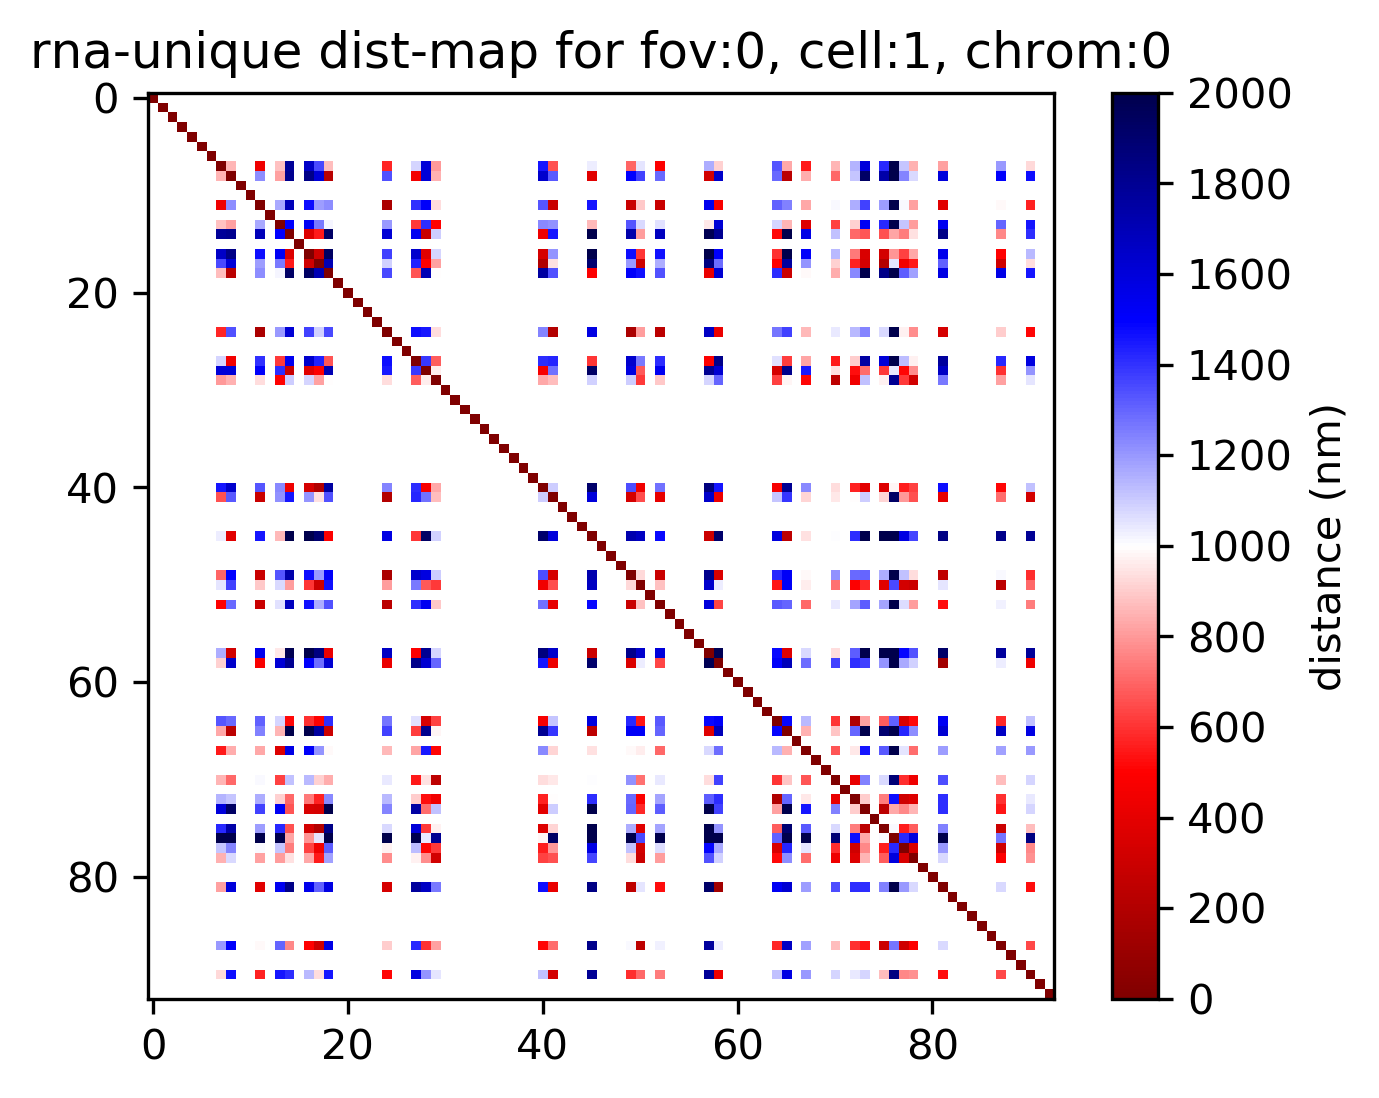

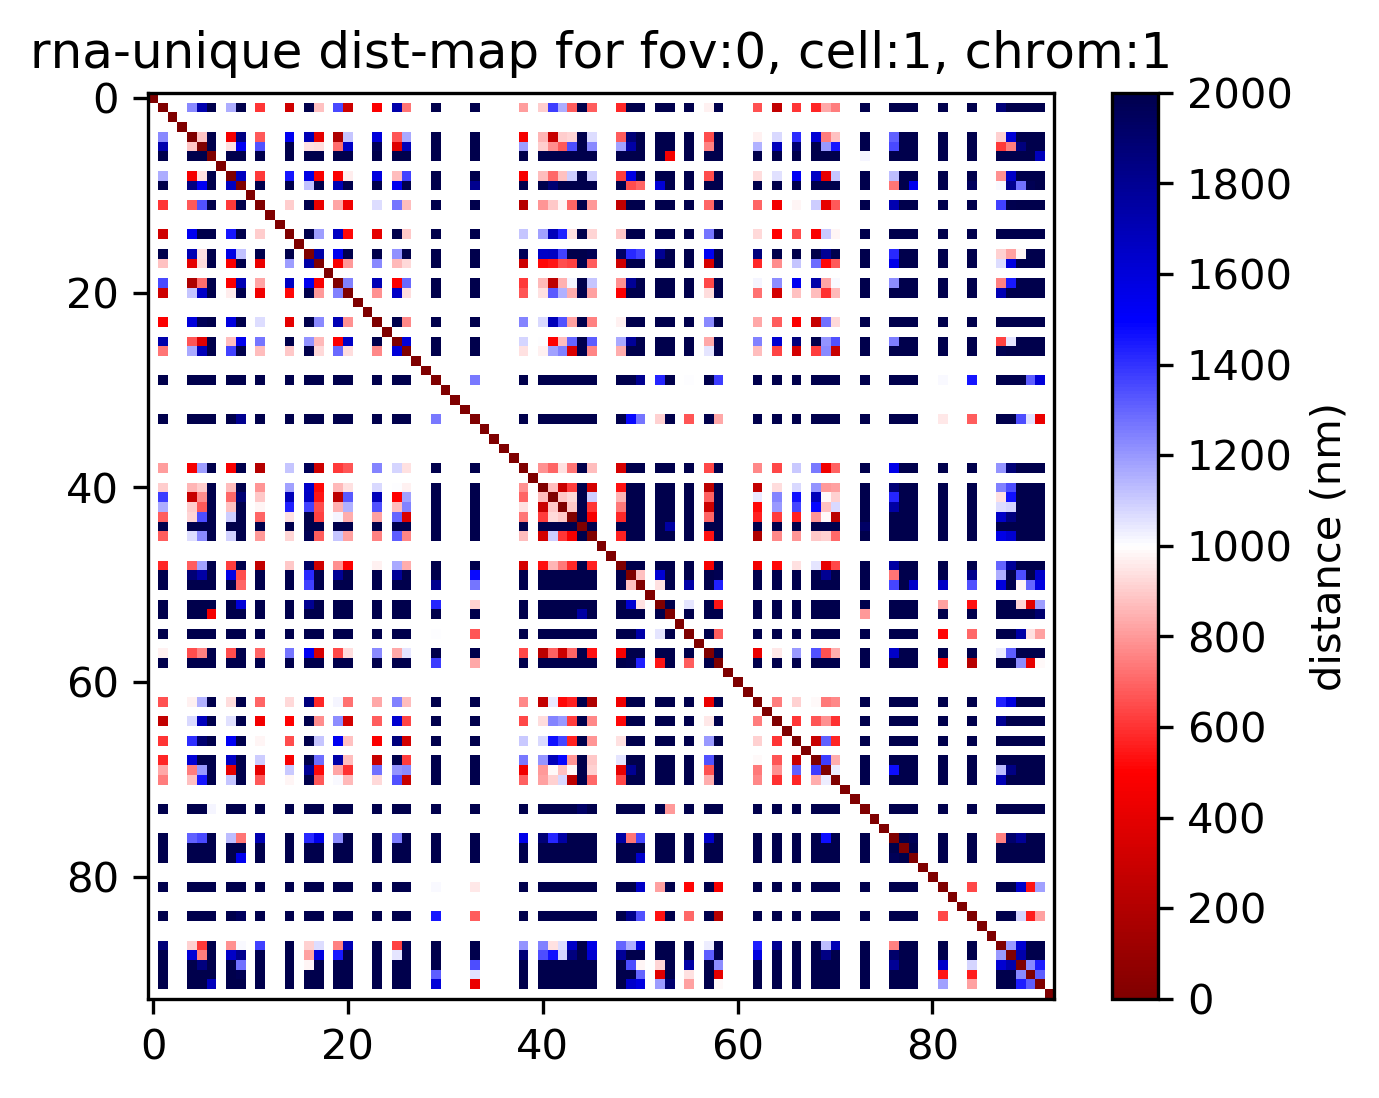

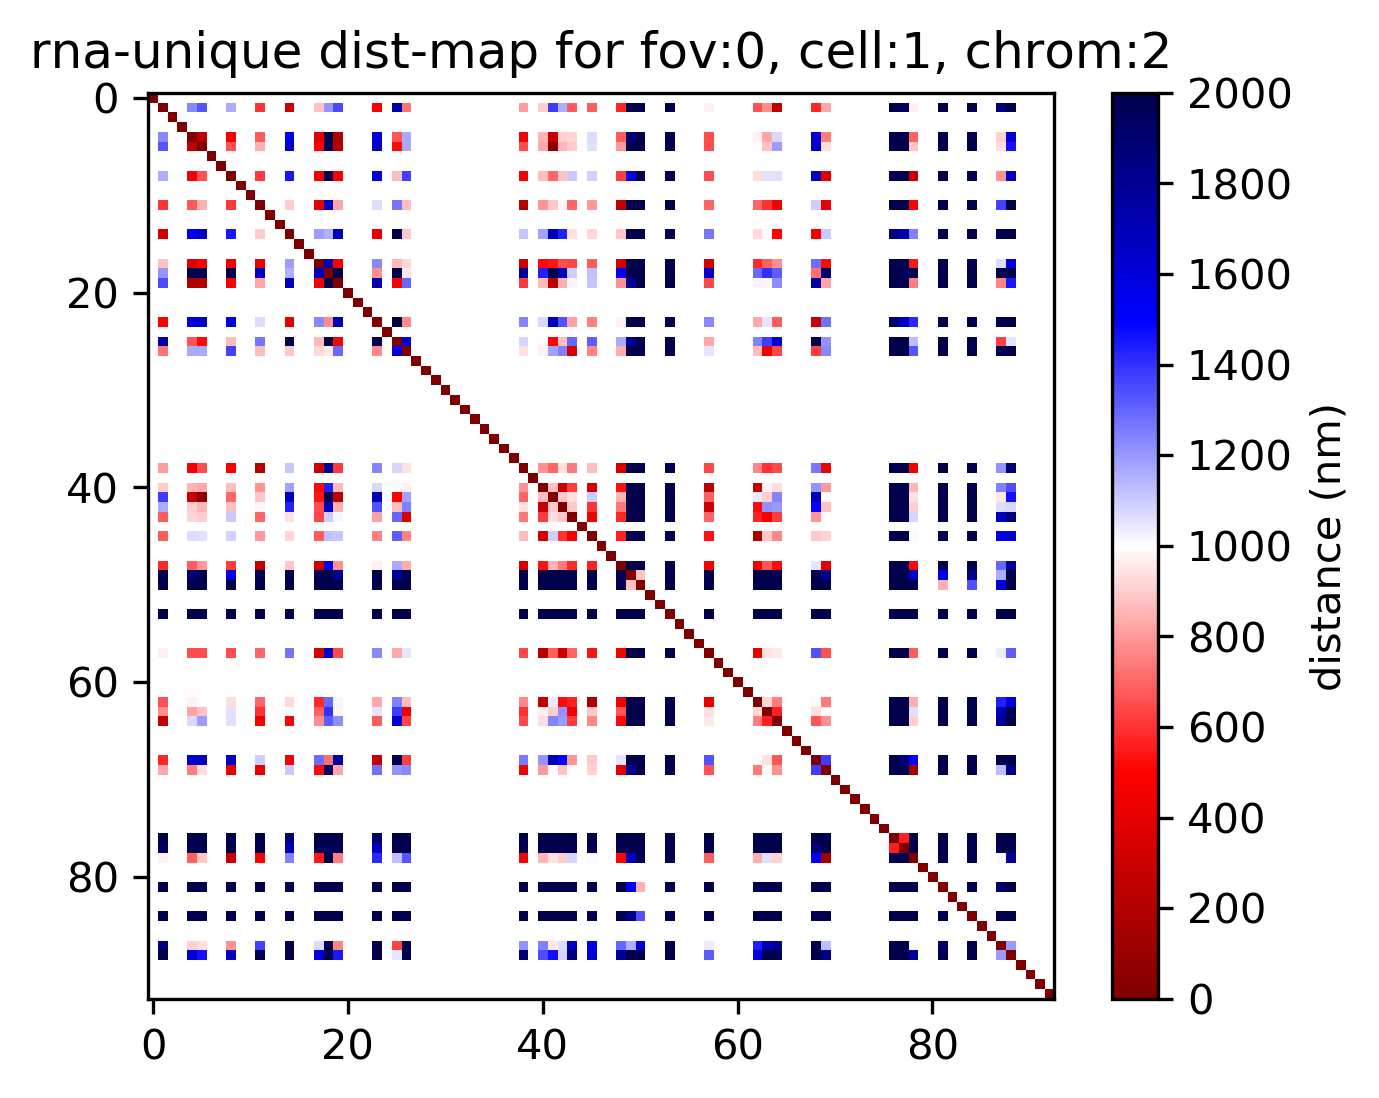

In [113]:
%matplotlib inline
distmaps = rna._generate_distance_map('rna-unique',_limits=[0,2000])

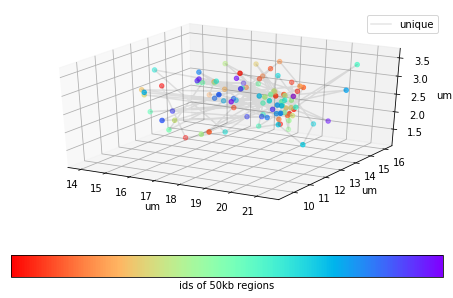

In [114]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = Axes3D(fig)
du_pts = np.array(dynamic_picked_pts[0])[:,1:4]*rna.distance_zxy/1000
#dd_pts = np.array(dynamic_decoded_pts[0])[:,1:4][277:325]*a.distance_zxy

du_pts = du_pts[:]
#dd_pts = dd_pts[30:]
sc = ax.scatter3D(du_pts[:,1], du_pts[:,2],du_pts[:,0], c=np.array(rna.unique_ids), cmap='rainbow_r')
ax.plot(du_pts[:,1], du_pts[:,2],du_pts[:,0], label='unique', alpha=0.1, color='black')
#ax.plot(dd_pts[:,1], dd_pts[:,2],dd_pts[:,0], label='decoded', alpha=0.5)
plt.legend()
plt.xlabel('um')
plt.ylabel('um')
ax.set_zlabel('um')
cb = plt.colorbar(sc,ticks=np.arange(0,651,100),orientation="horizontal")
cb.set_label('ids of 50kb regions')
